<a href="https://colab.research.google.com/github/velmavasquez/Blindness-Detection-App/blob/master/BD-Model/sentdex_v4_fit_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

#must install pickle
import pickle

In [0]:
import os

In [4]:
# Load the Drive helper and mount 
from google.colab import drive

# Authorization set up
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# Google Drive working directory path 
cd "/content/drive/My Drive/DataAnalyticsProjects/Blindness-Detection-App"

/content/drive/My Drive/DataAnalyticsProjects/Blindness-Detection-App


In [6]:
pwd

'/content/drive/My Drive/DataAnalyticsProjects/Blindness-Detection-App'

In [7]:
ls *.pickle

training_data_brightness.pickle  X_brightness.pickle  y_brightness.pickle
training_data_color.pickle       X_color.pickle       y_color.pickle
training_data.pickle             X.pickle             y.pickle


In [0]:
# READ .picle files, they must be on your local directory

# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle","rb")
# y = pickle.load(pickle_in)

# pickle_in = open("training_data.pickle","rb")
# training_data = pickle.load(pickle_in)

pickle_in = open("X_brightness.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_brightness.pickle","rb")
y = pickle.load(pickle_in)

pickle_in = open("training_data_brightness.pickle","rb")
training_data = pickle.load(pickle_in)

## Once pickle files are loaded, only execute the cells below before every model run

In [0]:
import random
random.shuffle(training_data)

In [0]:
# for sample in training_data[:10]:
#     print(sample[1])

In [0]:
X = []
y = []

In [0]:
IMG_SIZE = 224

for features,label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Angel - Added this line cause y was a list and it need to be a numpy array
y = np.array(y).reshape(-1, 1)

In [0]:
# X.shape

In [0]:
# y.shape

In [0]:
# PART 3

In [0]:
import tensorflow as tf
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical


X = X/255.0
y = to_categorical(y)


model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.25)) 
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(16, (3, 3)))
# model.add(Activation('relu'))
# model.add(Dropout(0.25)) 
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(16, (3, 3)))
# model.add(Activation('relu'))
# model.add(Dropout(0.25)) 
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(5))
# model.add(Activation('sigmoid'))
model.add(Activation('softmax'))


# model.compile(loss='binary_crossentropy',
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
#               optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X, y, batch_size=32, epochs=5, validation_split=0.15,class_weight={0:0.4057, 1:1.9794, 2:0.7331, 3:3.7948, 4:2.4827},verbose=0)

Using TensorFlow backend.
W0712 07:08:46.781156 140560875431808 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


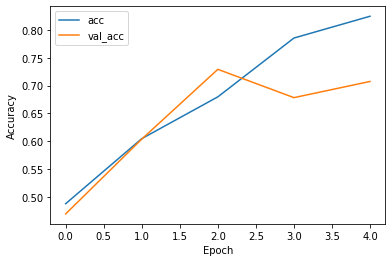

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
 
plt.plot(acc)
plt.plot(val_acc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

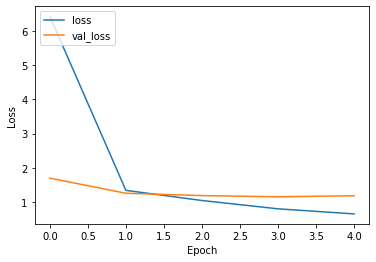

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
 
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(X, y)
print('Test accuracy: ',test_acc)
print('Test loss: ',test_loss)

3662/3662 [==============================] - ETA: 28s - loss: 0.3915 - acc: 0.93 - ETA: 24s - loss: 0.4276 - acc: 0.93 - ETA: 22s - loss: 0.4443 - acc: 0.90 - ETA: 21s - loss: 0.4405 - acc: 0.90 - ETA: 21s - loss: 0.4450 - acc: 0.90 - ETA: 21s - loss: 0.4464 - acc: 0.90 - ETA: 20s - loss: 0.4392 - acc: 0.91 - ETA: 20s - loss: 0.4173 - acc: 0.91 - ETA: 19s - loss: 0.4102 - acc: 0.91 - ETA: 19s - loss: 0.4158 - acc: 0.91 - ETA: 19s - loss: 0.4109 - acc: 0.91 - ETA: 19s - loss: 0.4109 - acc: 0.91 - ETA: 18s - loss: 0.4066 - acc: 0.92 - ETA: 18s - loss: 0.4118 - acc: 0.92 - ETA: 18s - loss: 0.4177 - acc: 0.91 - ETA: 18s - loss: 0.4262 - acc: 0.91 - ETA: 18s - loss: 0.4242 - acc: 0.91 - ETA: 17s - loss: 0.4248 - acc: 0.91 - ETA: 17s - loss: 0.4329 - acc: 0.90 - ETA: 17s - loss: 0.4304 - acc: 0.91 - ETA: 17s - loss: 0.4324 - acc: 0.90 - ETA: 16s - loss: 0.4284 - acc: 0.90 - ETA: 16s - loss: 0.4447 - acc: 0.90 - ETA: 16s - loss: 0.4495 - acc: 0.89 - ETA: 16s - loss: 0.4463 - acc: 0.90 - ETA: 

In [0]:
y[0:10]

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [0]:
# Predict the probabilities for each class 
model.predict(X[[0],:])

array([[0.02899703, 0.15646192, 0.35071576, 0.32050017, 0.14332515]],
      dtype=float32)

In [0]:
# type(history)